# How to Calculate Bootstrap Confidence Intervals For Machine Learning Results in Python
It is important to both present the expected skill of a machine learning model a well as confidence intervals for that model skill.

Confidence intervals provide a range of model skills and a likelihood that the model skill will fall between the ranges when making predictions on new data. For example, a 95% likelihood of classification accuracy between 70% and 75%.

A robust way to calculate confidence intervals for machine learning algorithms is to use the bootstrap. This is a general technique for estimating statistics that can be used to calculate empirical confidence intervals, regardless of the distribution of skill scores (e.g. non-Gaussian)

In this post, you will discover how to use the bootstrap to calculate confidence intervals for the performance of your machine learning algorithms.

After reading this post, you will know:

* How to estimate confidence intervals of a statistic using the bootstrap.
* How to apply this method to evaluate machine learning algorithms.
* How to implement the bootstrap method for estimating confidence intervals in Python.

Let’s get started.

## Bootstrap Confidence Intervals
Calculating confidence intervals with the bootstrap involves two steps:

1. Calculate a Population of Statistics
2. Calculate Confidence Intervals

### 1. Calculate a Population of Statistics
The first step is to use the bootstrap procedure to resample the original data a number of times and calculate the statistic of interest.

The dataset is sampled with replacement. This means that each time an item is selected from the original dataset, it is not removed, allowing that item to possibly be selected again for the sample.

The statistic is calculated on the sample and is stored so that we build up a population of the statistic of interest.

The number of bootstrap repeats defines the variance of the estimate, and more is better, often hundreds or thousands.

We can demonstrate this step with the following pseudocode.

In [ ]:
statistics = []
for i in bootstraps:
	sample = select_sample_with_replacement(data)
	stat = calculate_statistic(sample)
	statistics.append(stat)

### 2. Calculate Confidence Interval
Now that we have a population of the statistics of interest, we can calculate the confidence intervals.

This is done by first ordering the statistics, then selecting values at the chosen percentile for the confidence interval. The chosen percentile in this case is called alpha.

For example, if we were interested in a confidence interval of 95%, then alpha would be 0.95 and we would select the value at the 2.5% percentile as the lower bound and the 97.5% percentile as the upper bound on the statistic of interest.

For example, if we calculated 1,000 statistics from 1,000 bootstrap samples, then the lower bound would be the 25th value and the upper bound would be the 975th value, assuming the list of statistics was ordered.

In this, we are calculating a non-parametric confidence interval that does not make any assumption about the functional form of the distribution of the statistic. This confidence interval is often called the empirical confidence interval.

We can demonstrate this with pseudocode below.

In [ ]:
ordered = sort(statistics)
lower = percentile(ordered, (1-alpha)/2)
upper = percentile(ordered, alpha+((1-alpha)/2))

## Bootstrap Model Performance
The bootstrap can be used to evaluate the performance of machine learning algorithms.

The size of the sample taken each iteration may be limited to 60% or 80% of the available data. This will mean that there will be some samples that are not included in the sample. These are called out of bag (OOB) samples.

A model can then be trained on the data sample each bootstrap iteration and evaluated on the out of bag samples to give a performance statistic, which can be collected and from which confidence intervals may be calculated.

We can demonstrate this process with the following pseudocode.

In [ ]:
statistics = []
for i in bootstraps:
	train, test = select_sample_with_replacement(data, size)
	model = train_model(train)
	stat = evaluate_model(test)
	statistics.append(stat)

## Calculate Classification Accuracy Confidence Interval
This section demonstrates how to use the bootstrap to calculate an empirical confidence interval for a machine learning algorithm on a real-world dataset using the Python machine learning library scikit-learn.

First, download the Pima Indians dataset and place it in your current working directory with the filename “*pima–indians-diabetes.csv*”.

We will load the dataset using Pandas.

In [ ]:
# load dataset
data = read_csv('pima-indians-diabetes.csv', header=None)
values = data.values

Next, we will configure the bootstrap. We will use 1,000 bootstrap iterations and select a sample that is 50% the size of the dataset.

In [ ]:
# configure bootstrap
n_iterations = 1000
n_size = int(len(data) * 0.50)

Next, we will iterate over the bootstrap.

The sample will be selected with replacement using the resample() function from sklearn. Any rows that were not included in the sample are retrieved and used as the test dataset. Next, a decision tree classifier is fit on the sample and evaluated on the test set, a classification score calculated, and added to a list of scores collected across all the bootstraps.

In [ ]:
# run bootstrap
stats = list()
for i in range(n_iterations):
	# prepare train and test sets
	train = resample(values, n_samples=n_size)
	test = numpy.array([x for x in values if x.tolist() not in train.tolist()])
	# fit model
	model = DecisionTreeClassifier()
	model.fit(train[:,:-1], train[:,-1])
	# evaluate model
	predictions = model.predict(test[:,:-1])
	score = accuracy_score(test[:,-1], predictions)

Once the scores are collected, a histogram is created to give an idea of the distribution of scores. We would generally expect this distribution to be Gaussian, perhaps with a skew with a symmetrical variance around the mean.

Finally, we can calculate the empirical confidence intervals using the percentile() NumPy function. A 95% confidence interval is used, so the values at the 2.5 and 97.5 percentiles are selected.

Putting this all together, the complete example is listed below.

0.703862660944206
0.68
0.7316017316017316
0.6580645161290323
0.6947368421052632
0.6760869565217391
0.6808510638297872
0.6701902748414377
0.6911447084233261
0.6645161290322581
0.7383966244725738
0.6997840172786177
0.7161290322580646
0.7239130434782609
0.6673913043478261
0.6795698924731183
0.6573875802997858
0.6876355748373102
0.7310195227765727
0.6888412017167382
0.6904761904761905
0.6946236559139785
0.6869747899159664
0.7245762711864406
0.7414529914529915
0.7091295116772823
0.655982905982906
0.696969696969697
0.6866952789699571
0.7199170124481328
0.7272727272727273
0.688034188034188
0.7186813186813187
0.7173447537473233
0.6828193832599119
0.676595744680851
0.648936170212766
0.7151898734177216
0.6982758620689655
0.6873661670235546
0.693304535637149
0.6896551724137931
0.6857142857142857
0.6852248394004282
0.7243589743589743
0.7012987012987013
0.7121535181236673
0.6263736263736264
0.7008547008547008
0.6937901498929336
0.7235421166306696
0.7030567685589519
0.6709401709401709
0.678260869565

0.7306034482758621
0.7083333333333334
0.6829787234042554
0.6909871244635193
0.6809421841541756
0.6909871244635193
0.6868250539956804
0.6558441558441559
0.7074688796680498
0.7105831533477321
0.6957446808510638
0.6929637526652452
0.6946236559139785
0.6780383795309168
0.631236442516269
0.7182795698924731
0.6767241379310345
0.6856540084388185
0.7015250544662309
0.7222222222222222
0.6695464362850972
0.6673913043478261
0.7082452431289641
0.6565217391304348
0.7039473684210527
0.67170626349892
0.6808510638297872
0.6552462526766595
0.6709677419354839
0.6991525423728814
0.7204301075268817
0.6847599164926931
0.6681034482758621
0.7067833698030634
0.6688034188034188
0.6991525423728814
0.6666666666666666
0.7
0.664488017429194
0.6795698924731183
0.6851063829787234
0.7145922746781116
0.6899563318777293
0.7167381974248928
0.7429805615550756
0.6960352422907489
0.6393805309734514
0.7155172413793104
0.6898047722342733
0.6601731601731602
0.6673728813559322
0.6916299559471366
0.6745182012847966
0.7149028077

0.6645299145299145
0.6976241900647948
0.6810344827586207
0.6695278969957081
0.6695842450765864
0.70276008492569
0.6918103448275862
0.6781115879828327
0.6768558951965066
0.6794871794871795
0.6928104575163399
0.7025862068965517
0.6869565217391305
0.6802575107296137
0.6963123644251626
0.690677966101695
0.6840958605664488
0.6974789915966386
0.7468085106382979
0.6580645161290323
0.6857749469214437
0.6476793248945147
0.7170626349892009
0.6956521739130435
0.6976241900647948
0.6997840172786177
0.6963906581740976
0.6958424507658644
0.697228144989339
0.7254901960784313
0.7198275862068966
0.6810344827586207
0.7274678111587983
0.6961206896551724
0.7167755991285403
0.7077922077922078
0.6440677966101694
0.6347826086956522
0.676595744680851
0.6688453159041394
0.7235421166306696
0.7030567685589519
0.702355460385439
0.6778947368421052
0.6617021276595745
0.7192982456140351
0.7329059829059829
0.7105831533477321
0.6377118644067796
0.6960167714884696
0.6967741935483871
0.6752136752136753
0.6681318681318681

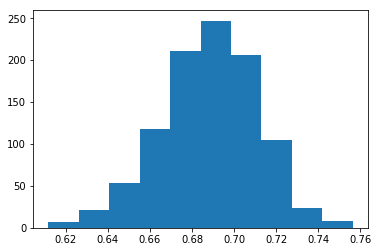

95.0 confidence interval 63.9% and 73.0%


In [1]:
import numpy
from pandas import read_csv
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
%matplotlib inline
# load dataset
data = read_csv('pima-indians-diabetes.csv', header=None)
values = data.values
# configure bootstrap
n_iterations = 1000
n_size = int(len(data) * 0.50)
# run bootstrap
stats = list()
for i in range(n_iterations):
	# prepare train and test sets
	train = resample(values, n_samples=n_size)
	test = numpy.array([x for x in values if x.tolist() not in train.tolist()])
	# fit model
	model = DecisionTreeClassifier()
	model.fit(train[:,:-1], train[:,-1])
	# evaluate model
	predictions = model.predict(test[:,:-1])
	score = accuracy_score(test[:,-1], predictions)
	print(score)
	stats.append(score)
# plot scores
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, numpy.percentile(stats, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, numpy.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

Running the example prints the classification accuracy each bootstrap iteration.

A histogram of the 1,000 accuracy scores is created showing a Gaussian-like distribution.

Finally, the confidence intervals are reported, showing that there is a 95% likelihood that the confidence interval 64.4% and 73.0% covers the true skill of the model.

This same method can be used to calculate confidence intervals of any other errors scores, such as root mean squared error for regression algorithms.

## Summary
In this post, you discovered how to use the bootstrap to calculate confidence intervals for machine learning algorithms.

Specifically, you learned:

* How to calculate the bootstrap estimate of confidence intervals of a statistic from a dataset.
* How to apply the bootstrap to evaluate machine learning algorithms.
* How to calculate bootstrap confidence intervals for machine learning algorithms in Python.